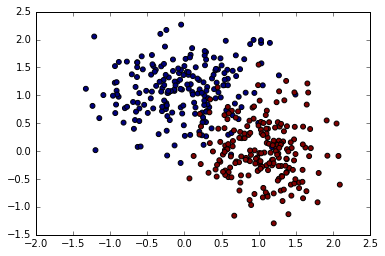

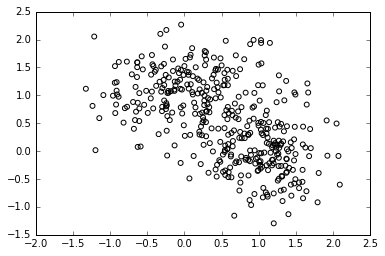

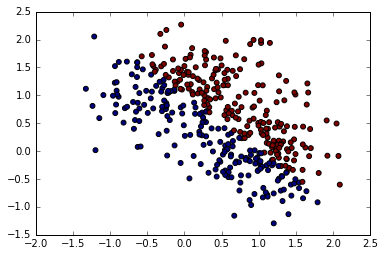

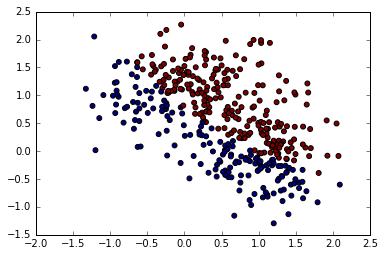

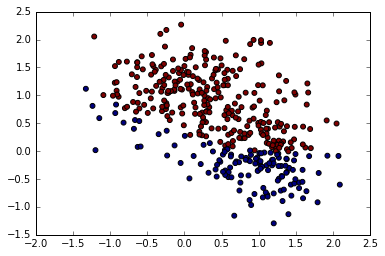

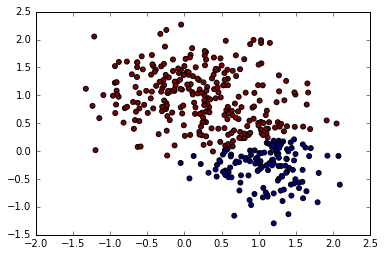

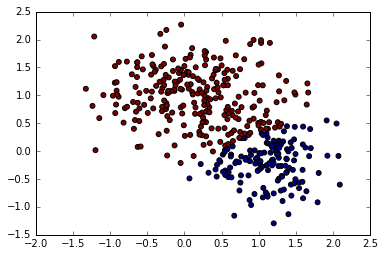

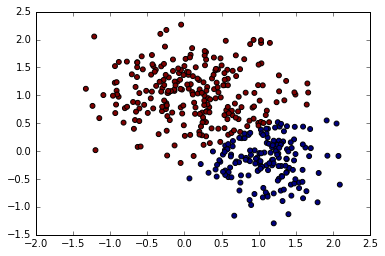

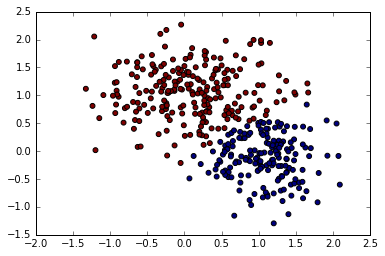

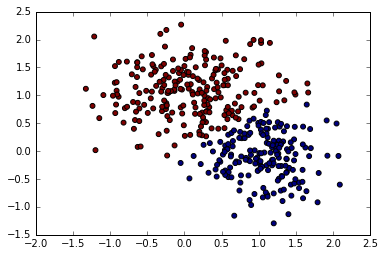

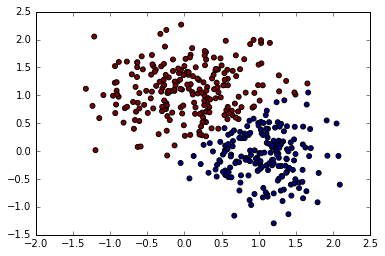

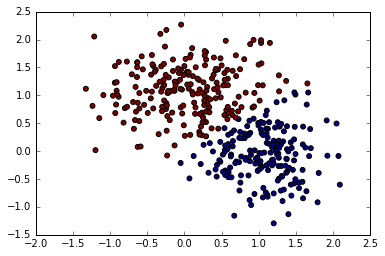

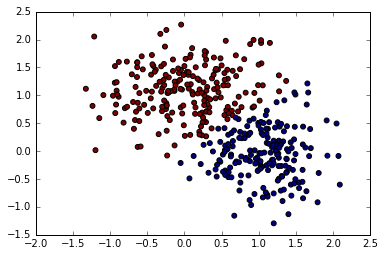

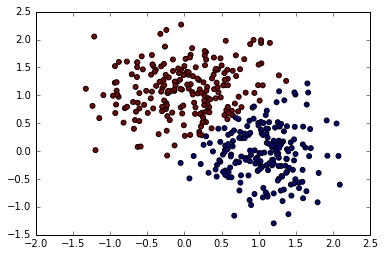

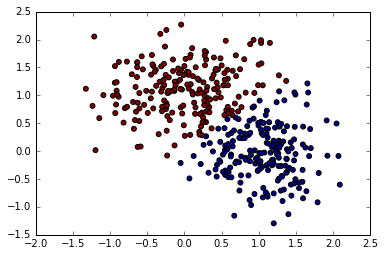

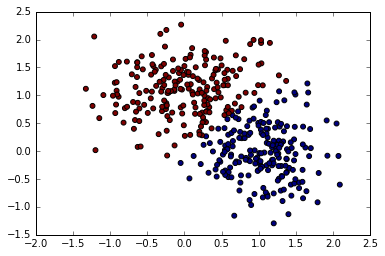

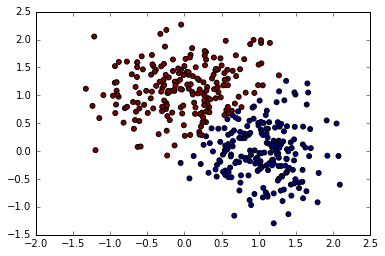

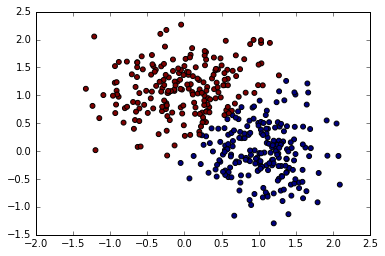

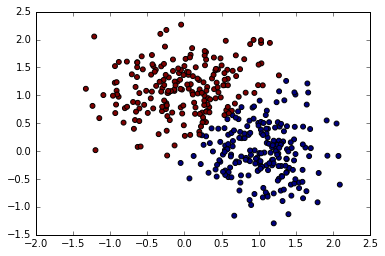

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat, loadmat
from scipy.stats import multivariate_normal

epsilon = 0.01

class GMM:
    
    def __init__(self, Points, parameters):
        self.eps = 0.01
        self.parameters = parameters
        self.Points = Points
        self.Prediction = []
        
    def E_step(self):
        self.Prediction = [0] * len(self.Points)
        for index, point in enumerate(self.Points):
            p0 = self.parameters['lam'][0] * multivariate_normal.pdf(point, self.parameters['m_0'], self.parameters['sig_0'])
            p1 = self.parameters['lam'][1] * multivariate_normal.pdf(point, self.parameters['m_1'], self.parameters['sig_1'])
            if p0 > p1:
                self.Prediction[index] = 0
            else:         
                self.Prediction[index] = 1

    def M_step(self, parameters):
        points_of_cluster0 = [point for index,point in enumerate(self.Points) if self.Prediction[index]==0]
        points_of_cluster1 = [point for index,point in enumerate(self.Points) if self.Prediction[index]==1]

        parameters['lam'] = [len(points_of_cluster0) * 1.0 / (len(points_of_cluster0) + len(points_of_cluster1)), len(points_of_cluster1) * 1.0 / (len(points_of_cluster0) + len(points_of_cluster1))]

        parameters['m_0'] = np.mean(np.array(points_of_cluster0), axis=0)
        parameters['m_1'] = np.mean(np.array(points_of_cluster1), axis=0)

        parameters['sig_0'] = np.std(np.array(points_of_cluster0), axis=0)
        parameters['sig_1'] = np.std(np.array(points_of_cluster1), axis=0)
        
        self.updated_parameters = parameters.copy()
    
    def run(self):
        distance = 100
        iteration = 1
        while distance > self.eps:
            
            fig = plt.figure()
            plt.scatter(self.Points[:,0], self.Points[:,1], 24, c=self.Prediction)
            plt.show()
            # fig.savefig('./Results/iteration-'+str(iteration)+'.png')
            iteration += 1
            
            self.E_step()
            self.M_step(self.parameters.copy())

            distance = np.sqrt(np.sum(np.square(self.parameters['m_0']-self.updated_parameters['m_0'])
                           +np.square(self.parameters['m_1']-self.updated_parameters['m_1'])))

            self.parameters = self.updated_parameters.copy()

Data = loadmat('GMM-Points.mat')
Points = Data['Points'][:,0:2]
Label = Data['Points'][:,2]

fig = plt.figure()
plt.scatter(Points[:,0], Points[:,1], 24, c=Label)
plt.show()

parameters = dict([('m_0', [0.2, 0.2]), ('sig_0', [0.5, 0.5]), ('m_1', [0.8, 0.8]), ('sig_1', [0.5, 0.5]), ('lam', [0.5, 0.5])])
gmm = GMM(Points, parameters)
gmm.run()

fig = plt.figure()
plt.scatter(Points[:,0], Points[:,1], 24, c=gmm.Prediction)
plt.show()